1702.127659574468
100000.0 32000.0
87878.78787878789 1.8110734903560506e-07


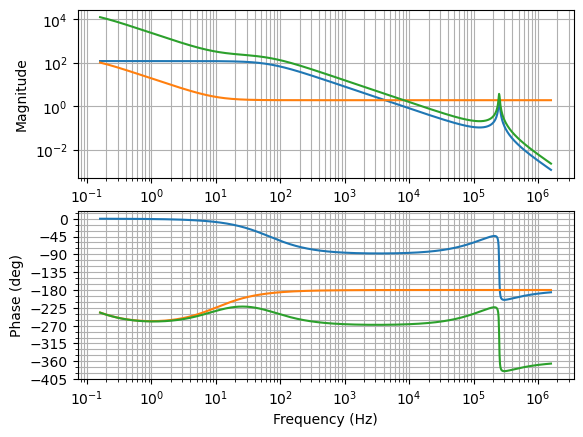

In [192]:
import control as co
import matplotlib.pyplot as plt
import numpy as np

V_in, V_o, f_sw, R_o, L, C_o, R_esr = 5, 3.3, 500e+3, 50, 47e-6, 47e-6, 20e-3
V_ref, g_m = 0.8, 92e-6
R_i = 1 / 10
S_n, S_f, S_e = R_i * (V_in - V_o) / L, R_i * V_o / L, 1800
print((S_f - S_n) / 2)

R_1 = 100e+3
R_4 = V_ref / (V_o - V_ref) * R_1

# f_z, f_p = 5e+3, 80e+3
# f_c = np.sqrt(f_z * f_p)
# a = np.sqrt(1 + (f_c / f_p) ** 2)
# b = np.sqrt(1 + (f_z / f_c) ** 2)
# G_fc = -2
# G = 10 ** (G_fc / 20)
# R_comp = f_p * G * (R_1 + R_4) / ((f_p - f_z) * R_4 * g_m) * a / b
# C_comp = 1 / (2 * np.pi * f_z * R_comp)
# C_o_ea = R_4 * g_m / (2 * np.pi * f_p * G * (R_1 + R_4)) * b / a
f_pc, f_zc = 1e+1, 1
R_o_ota = 8.7e+6
C_comp = 1 / (2 * np.pi * R_o_ota) * (1 / f_pc - 1 / f_zc)
R_comp = 1 / (2 * np.pi * C_comp * f_zc)

F_m = f_sw / (S_n + S_e)
G_di = co.tf([V_in], [L, 0])
H_e = co.tf([1 / ((np.pi ** 2) * (f_sw ** 2)), -1 / (2 * f_sw), 1], [1])

G_ci = (F_m * G_di) / (1 + F_m * G_di * R_i * H_e)
Z_o = R_o * co.tf([R_esr * C_o, 1], [(R_esr + R_o) * C_o, 1])
G_div = V_ref / V_o
G_oc = g_m * G_div * R_o_ota * co.tf([R_comp * C_comp, 1], [(R_o_ota + R_comp) * C_comp, 1])

loop_gain = G_ci * Z_o * G_div * G_oc

mag, phase, omega = co.bode(G_ci * Z_o * G_div, np.logspace(0, 7, 1000), Hz=True)
mag, phase, omega = co.bode(G_oc, np.logspace(0, 7, 1000), Hz=True)
mag, phase, omega = co.bode(loop_gain, np.logspace(0, 7, 1000), Hz=True)

print(R_1, R_4)
print(R_comp, C_comp)


In [128]:
co.tf([1, 2, 3], [1])

TransferFunction(array([1, 2, 3]), array([1]))